In [51]:
import pandas as pd

# Load the dataset
df = pd.read_csv("personalized_learning_dataset.csv")

# Show first few rows
df.head()

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


In [52]:
# Check data types and missing values
df.info()
print("\nMissing values:\n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

In [53]:
# Create performance band labels
df["Score_Band"] = pd.cut(
    df["Final_Exam_Score"],
    bins=[0, 60, 80, 100],
    labels=["Low", "Medium", "High"]
)

In [54]:
X = df[[
    "Age",
    "Time_Spent_on_Videos",
    "Quiz_Attempts",
    "Quiz_Scores",
    "Forum_Participation",
    "Assignment_Completion_Rate"
]]
y = df["Score_Band"]

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 75 388  81]
 [143 564 167]
 [ 71 410 101]]
              precision    recall  f1-score   support

        High       0.26      0.14      0.18       544
         Low       0.41      0.65      0.50       874
      Medium       0.29      0.17      0.22       582

    accuracy                           0.37      2000
   macro avg       0.32      0.32      0.30      2000
weighted avg       0.34      0.37      0.33      2000



In [56]:
from sklearn.preprocessing import LabelEncoder

# Copy your original DataFrame
df_label = df.copy()

# Encode these columns
categorical_cols = ["Gender", "Education_Level", "Course_Name", "Engagement_Level", "Learning_Style"]

le = LabelEncoder()
for col in categorical_cols:
    df_label[col] = le.fit_transform(df_label[col])

# Redefine features and target
X = df_label[numeric_features + categorical_cols]
y = df_label["Score_Band"]

In [57]:
df["Quiz_Score_Per_Attempt"] = df["Quiz_Scores"] / df["Quiz_Attempts"]
df["Engagement_Index"] = df["Forum_Participation"] + df["Assignment_Completion_Rate"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 41 441  62]
 [ 98 647 129]
 [ 51 450  81]]
              precision    recall  f1-score   support

        High       0.22      0.08      0.11       544
         Low       0.42      0.74      0.54       874
      Medium       0.30      0.14      0.19       582

    accuracy                           0.38      2000
   macro avg       0.31      0.32      0.28      2000
weighted avg       0.33      0.38      0.32      2000



In [59]:
df["Score_Band"].value_counts()

Score_Band
Low       4369
Medium    2912
High      2719
Name: count, dtype: int64

In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Create search object
search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring="f1_weighted",
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Run search
search.fit(X_train, y_train)

# Best model
best_rf = search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[[ 64 402  78]
 [ 95 642 137]
 [ 79 431  72]]
              precision    recall  f1-score   support

        High       0.27      0.12      0.16       544
         Low       0.44      0.73      0.55       874
      Medium       0.25      0.12      0.17       582

    accuracy                           0.39      2000
   macro avg       0.32      0.33      0.29      2000
weighted avg       0.34      0.39      0.33      2000



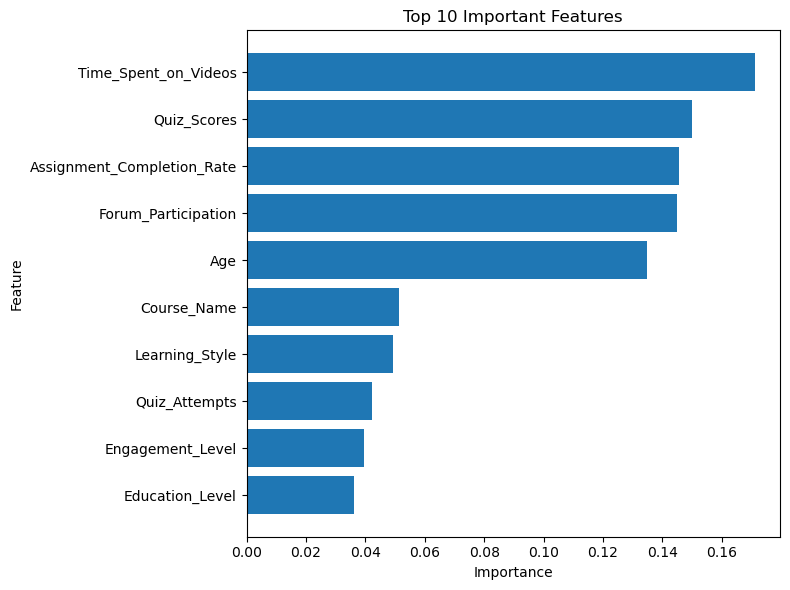

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = best_rf.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_df = feat_imp_df.sort_values("Importance", ascending=False)

# Plot top 10
plt.figure(figsize=(8,6))
plt.barh(feat_imp_df["Feature"].head(10), feat_imp_df["Importance"].head(10))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [62]:
top_features = feat_imp_df["Feature"].head(5).tolist()
X_reduced = X[top_features]

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# Retrain
best_rf.fit(X_train_r, y_train_r)
y_pred_r = best_rf.predict(X_test_r)

# Evaluate
print(confusion_matrix(y_test_r, y_pred_r))
print(classification_report(y_test_r, y_pred_r))

[[ 98 320 126]
 [130 552 192]
 [ 87 381 114]]
              precision    recall  f1-score   support

        High       0.31      0.18      0.23       544
         Low       0.44      0.63      0.52       874
      Medium       0.26      0.20      0.22       582

    accuracy                           0.38      2000
   macro avg       0.34      0.34      0.32      2000
weighted avg       0.35      0.38      0.35      2000



In [63]:
from sklearn.metrics import classification_report, f1_score

results = []

for k in range(2, 11):  # Top 2 to 10 features
    top_k = feat_imp_df["Feature"].head(k).tolist()
    X_k = X[top_k]
    
    X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(
        X_k, y, test_size=0.2, random_state=42, stratify=y
    )
    
    best_rf.fit(X_train_k, y_train_k)
    y_pred_k = best_rf.predict(X_test_k)
    
    f1 = f1_score(y_test_k, y_pred_k, average='weighted')
    results.append((k, f1))

# Print results
for k, score in results:
    print(f"Top {k} features → Weighted F1: {score:.4f}")

Top 2 features → Weighted F1: 0.3419
Top 3 features → Weighted F1: 0.3483
Top 4 features → Weighted F1: 0.3594
Top 5 features → Weighted F1: 0.3543
Top 6 features → Weighted F1: 0.3416
Top 7 features → Weighted F1: 0.3510
Top 8 features → Weighted F1: 0.3361
Top 9 features → Weighted F1: 0.3399
Top 10 features → Weighted F1: 0.3372


In [64]:
top_k_features = feat_imp_df["Feature"].head(4).tolist()
X_final = X[top_k_features]

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_final, y, test_size=0.2, stratify=y, random_state=42
)

final_rf = best_rf.fit(X_train_f, y_train_f)
final_preds = final_rf.predict(X_test_f)

print(classification_report(y_test_f, final_preds))

              precision    recall  f1-score   support

        High       0.28      0.20      0.23       544
         Low       0.45      0.59      0.51       874
      Medium       0.28      0.23      0.25       582

    accuracy                           0.38      2000
   macro avg       0.34      0.34      0.33      2000
weighted avg       0.36      0.38      0.36      2000



In [65]:
# numeric_features = [
#     "Age",
#     "Time_Spent_on_Videos",
#     "Quiz_Attempts",
#     "Quiz_Scores",
#     "Forum_Participation",
#     "Assignment_Completion_Rate"
# ]

# X = df[numeric_features]
# y = df["Final_Exam_Score"]

In [29]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train Random Forest
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# # Evaluate
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE: {rmse:.2f}")
# print(f"R² Score: {r2:.2f}")

RMSE: 20.97
R² Score: -0.06


In [23]:
# from sklearn.preprocessing import LabelEncoder

# # Reload fresh data if needed
# df = pd.read_csv("personalized_learning_dataset.csv")

# # Drop ID and post-outcome columns
# df = df.drop(columns=["Student_ID", "Feedback_Score", "Dropout_Likelihood"])

# # Label encode selected categorical columns
# label_cols = ["Gender", "Education_Level", "Course_Name", "Engagement_Level", "Learning_Style"]
# le = LabelEncoder()

# for col in label_cols:
#     df[col] = le.fit_transform(df[col])

In [25]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# # Features (X) and target (y)
# X = df_encoded.drop("Final_Exam_Score", axis=1)
# y = df_encoded["Final_Exam_Score"]

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluation
# import numpy as np
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 20.35
R² Score: -0.00


In [27]:
# # Define features and target
# X = df.drop("Final_Exam_Score", axis=1)
# y = df["Final_Exam_Score"]

# # Train/test split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train model
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# # Evaluate
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE: {rmse:.2f}")
# print(f"R² Score: {r2:.2f}")

RMSE: 20.64
R² Score: -0.03


In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# # Train a Random Forest
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Predict and evaluate
# rf_pred = rf_model.predict(X_test)

# rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
# rf_r2 = r2_score(y_test, rf_pred)

# print(f"Random Forest RMSE: {rf_rmse:.2f}")
# print(f"Random Forest R² Score: {rf_r2:.2f}")

Random Forest RMSE: 20.70
Random Forest R² Score: -0.04


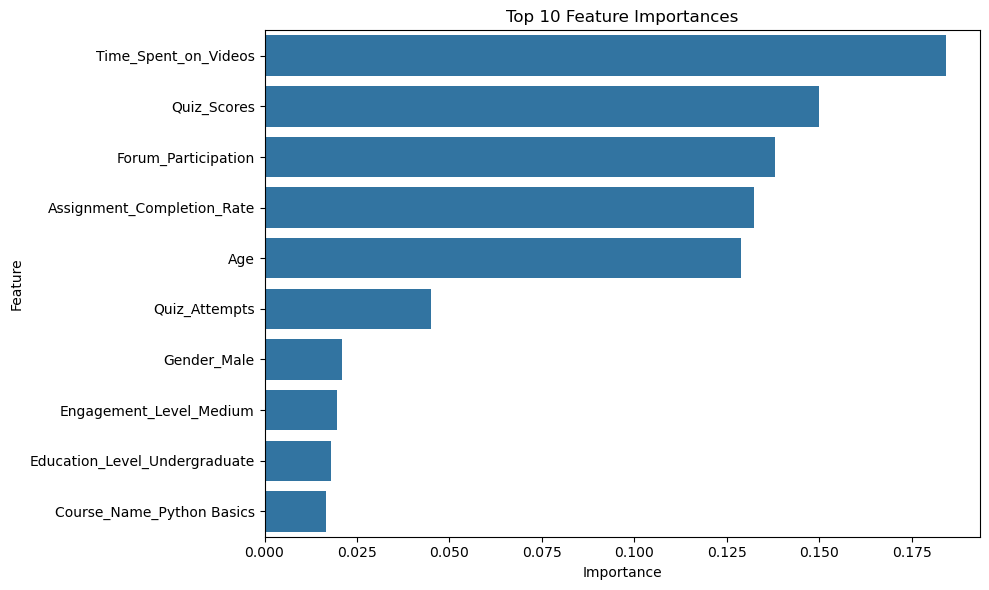

In [12]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Feature importance
# importances = rf_model.feature_importances_
# features = X.columns

# # Create a DataFrame
# feat_df = pd.DataFrame({
#     "Feature": features,
#     "Importance": importances
# }).sort_values(by="Importance", ascending=False)

# # Plot
# plt.figure(figsize=(10,6))
# sns.barplot(data=feat_df.head(10), x="Importance", y="Feature")
# plt.title("Top 10 Feature Importances")
# plt.tight_layout()
# plt.show()

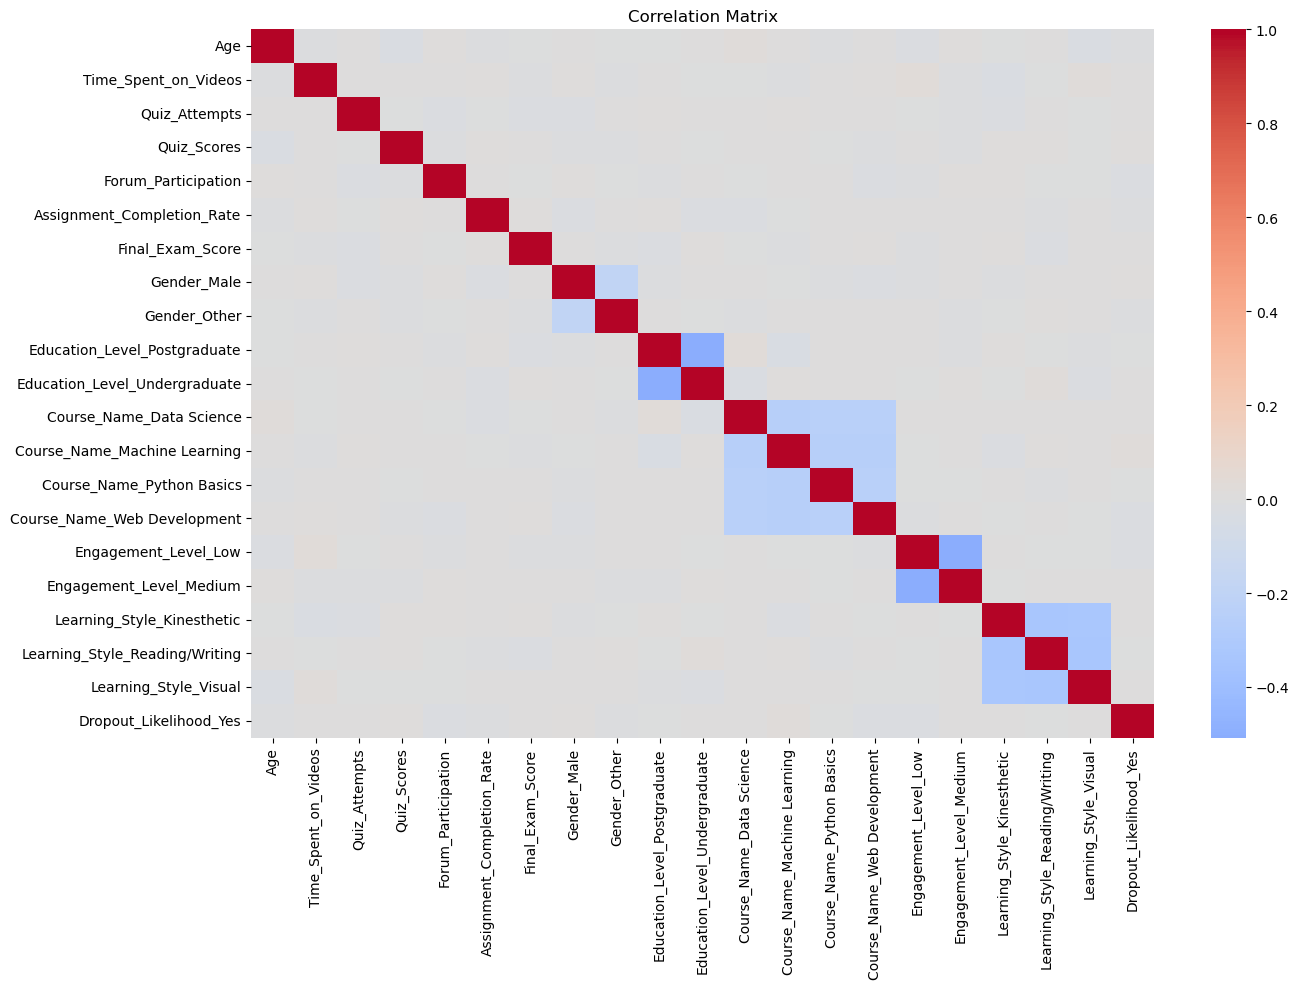

In [13]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Compute correlation matrix
# corr_matrix = df_encoded.corr()

# # Plot heatmap
# plt.figure(figsize=(14,10))
# sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f")
# plt.title("Correlation Matrix")
# plt.tight_layout()
# plt.show()

In [14]:
# Unstack the correlation matrix and sort
corr_pairs = corr_matrix.unstack().sort_values(key=lambda x: abs(x), ascending=False)

# Drop self-correlations
strong_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Show top 10 strongest
strong_pairs.drop_duplicates().head(10)


Education_Level_Postgraduate    Education_Level_Undergraduate    -0.508159
Engagement_Level_Low            Engagement_Level_Medium          -0.507035
Learning_Style_Visual           Learning_Style_Reading/Writing   -0.340388
Learning_Style_Reading/Writing  Learning_Style_Kinesthetic       -0.332994
Learning_Style_Kinesthetic      Learning_Style_Visual            -0.330455
Course_Name_Machine Learning    Course_Name_Python Basics        -0.252880
                                Course_Name_Data Science         -0.252088
                                Course_Name_Web Development      -0.249628
Course_Name_Python Basics       Course_Name_Data Science         -0.248283
Course_Name_Web Development     Course_Name_Python Basics        -0.245861
dtype: float64

In [16]:
# from xgboost import XGBRegressor

In [ ]:
# from xgboost import XGBRegressor

# xgb = XGBRegressor(n_estimators=100, random_state=42)
# xgb.fit(X_train, y_train)
# xgb_pred = xgb.predict(X_test)

# xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
# xgb_r2 = r2_score(y_test, xgb_pred)

# print(f"XGBoost RMSE: {xgb_rmse:.2f}")
# print(f"XGBoost R² Score: {xgb_r2:.2f}")

XGBoost RMSE: 22.10
XGBoost R² Score: -0.18


In [18]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Separate features and target
# X = df_encoded.drop("Final_Exam_Score", axis=1)
# y = df_encoded["Final_Exam_Score"]

# # Train/test split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# # Evaluate
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE: {rmse:.2f}")
# print(f"R² Score: {r2:.2f}")

RMSE: 20.70
R² Score: -0.04
